### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### word to prevalence mapping
###### a simple mapping between word & prevalence score is created from 'Prevalence.csv' file, which will be used later.

In [3]:
#chunk size to read file in chunks
chunk_size_for_prevalence_file=10000

#store word to prevalence mapping which is used later
word_prevalence_map={}

for chunk in pd.read_csv("Prevalence.csv",chunksize=chunk_size_for_prevalence_file):
    for i in range(0,len(chunk)):
        word=chunk.iloc[i][0]
        prevalence=chunk.iloc[i][3]
        word_prevalence_map[word]=prevalence
print('word to prevalence mapping is created!')

word to prevalence mapping is created!


### creating small matrix (total & average prevalence) csv
###### rows for each user are read and total & average word prevalence is calculated for each user. 'average_prevalence.csv' (small matrix) file is created with the same format as of 'count matrix.csv' (big matrix), except all the words columns are removed and 2 new columns are added to keep total & average prevalence. Also one more 'chunk id' column is added at the front, but it is not useful any further is analysis (can be ignored)

In [4]:
def append_to_file(rows):
    with open('average_prevalence1.csv','a') as f:
        for row in rows:       
            f.writelines(','.join(row))
            f.write('\n')

#format of average_prevalence.csv file
header = [['CHUNK NO','ID','GENDER','AGE','INDUSTRY','ASTROLOGICAL SIGN','TOTAL PREVALENCE','AVERAGE PREVALENCE'],]

append_to_file(header)

def get_total_and_average_prevalence_score(row,count_matrix_headers):
    total_prevalence_score=0
    #skip first 5 columns(i.e id, gender, age, indusrty, astrological sign) & start from the words' columns
    for i in range(5,len(row)):
        word=count_matrix_headers[i]
        frequency=row[i]
        total_prevalence_score+= (word_prevalence_map[word]*frequency)
        
    average_prevalence_score=(total_prevalence_score/(len(row)-5))
    
    total_and_average_prevalence_score=[]
    total_and_average_prevalence_score.append(total_prevalence_score)
    total_and_average_prevalence_score.append(average_prevalence_score)
    return total_and_average_prevalence_score

chunk_size_for_big_matrix_file=500
chunk_count=0

for chunk_of_rows in pd.read_csv("count_matrix.csv",chunksize=chunk_size_for_big_matrix_file):
    new_rows=[]
    chunk_count+=1
    print('chunk no: ',chunk_count)
    count_matrix_headers=list(chunk_of_rows.columns.values)
    
    for i in range(0,len(chunk_of_rows)):
        new_row=[]
        #append first 5 columns(i.e chunk no, id, gender, age, indusrty, astrological sign) straight away
        new_row.append( str(chunk_count) )
        new_row.append( str(chunk_of_rows.iloc[i][0]) )
        new_row.append(chunk_of_rows.iloc[i][1])
        new_row.append( str(chunk_of_rows.iloc[i][2]) )
        new_row.append(chunk_of_rows.iloc[i][3])
        new_row.append(chunk_of_rows.iloc[i][4])
        
        total_and_average_prevalence_score=get_total_and_average_prevalence_score(chunk_of_rows.iloc[i], count_matrix_headers)
        new_row.append( str(total_and_average_prevalence_score[0]) )
        new_row.append( str(total_and_average_prevalence_score[1]) )
        
        #append to batch
        new_rows.append(new_row)
        
    #append new rows to average_prevalence.csv file in batch
    append_to_file(new_rows)        
    
    #if(chunk_count==100):
        #break

print('average_prevalence.csv file has been created!')

chunk no:  1
chunk no:  2
chunk no:  3
chunk no:  4
chunk no:  5
chunk no:  6
chunk no:  7
chunk no:  8
chunk no:  9
chunk no:  10
chunk no:  11
chunk no:  12
chunk no:  13
chunk no:  14
chunk no:  15
chunk no:  16
chunk no:  17
chunk no:  18
chunk no:  19
chunk no:  20
chunk no:  21
chunk no:  22
chunk no:  23
chunk no:  24
chunk no:  25
chunk no:  26
chunk no:  27
chunk no:  28
chunk no:  29
chunk no:  30
chunk no:  31
chunk no:  32
chunk no:  33
chunk no:  34
chunk no:  35
chunk no:  36
chunk no:  37
chunk no:  38
chunk no:  39
average_prevalence.csv file has been created!


### Creating visualization
###### 1. user age(Y) vs average prevalence score (X), 2. user age(Y) vs total prevalence score (X)

Age: Minumum  13 , Maximum  48
total prevalence: Minumum  35.64700000000001 , Maximum  390749.061000002 , Average  6191.0728668219845
average prevalence: Minumum  0.000577541233271767 , Maximum  6.330790658112212 , Average  0.10030577212050697


Text(0.5, 0.98, 'Age vs Average Prevalence')

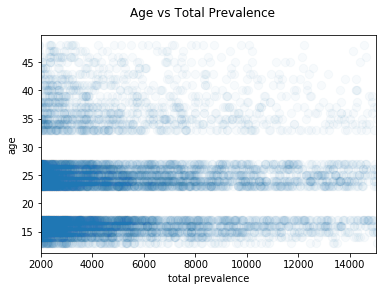

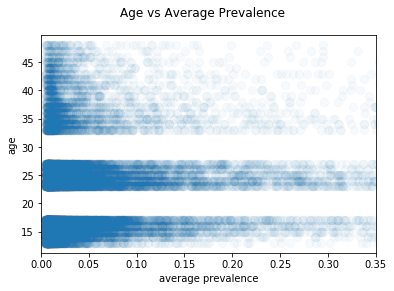

In [46]:
# reading data to plot
chunk_size=500
chunk_count=0
age=[]
total_prevalence=[]
average_prevalence=[]

for chunk_of_rows in pd.read_csv("average_prevalence.csv",chunksize=chunk_size):
    for i in range(0,len(chunk_of_rows)):
        age.append(int(chunk_of_rows.iloc[i][3]))
        total_prevalence.append(float(chunk_of_rows.iloc[i][6]))
        average_prevalence.append(float(chunk_of_rows.iloc[i][7]))

print("Age: Minumum ",min(age),", Maximum ",max(age))
print("total prevalence: Minumum ",min(total_prevalence),", Maximum ",max(total_prevalence),", Average ",(sum(total_prevalence)/len(total_prevalence)))
print("average prevalence: Minumum ",min(average_prevalence),", Maximum ",max(average_prevalence),", Average ",(sum(average_prevalence)/len(average_prevalence)))

fig,ax=plt.subplots()
ax.axis(xmin=2000,xmax=15000)
ax.scatter(total_prevalence,age, s=70, alpha=0.03)
ax.set_xlabel('total prevalence')
ax.set_ylabel('age')
fig.suptitle('Age vs Total Prevalence')

fig,ax=plt.subplots()
ax.axis(xmin=0,xmax=0.35)
ax.scatter(average_prevalence,age, s=70, alpha=0.03)
ax.set_xlabel('average prevalence')
ax.set_ylabel('age')
fig.suptitle('Age vs Average Prevalence')